# Trabalho em grupo - Ana Luisa, Ananda e Luis

## - HIPOTESE: Como a economia afeta o setor publico e privado de maneiras diferentes

## - Dataset: [BRICS - World Bank Indicator](https://www.kaggle.com/arslanali4343/real-estate-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1) Importando os datasets e abrindo para ver o conteúdo:

In [2]:
df_economy = pd.read_csv('data/BRICS Development Indicators/Economy_Data.csv', sep= ';')
df_private_sector = pd.read_csv('data/BRICS Development Indicators/PrivateSector_Data.csv', sep=';')
df_public_sector = pd.read_csv('data/BRICS Development Indicators/PublicSector_Indicators.csv', sep=';')

### a) ECONOMY dataset information:
- count: 86500
- valores nulos? SIM
- linhas completas: 60348 ( depois do `dropna` )

In [3]:
df_economy.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,1970.0,NaN
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,1970.0,NaN
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,1970.0,NaN
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,1970.0,NaN
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,1970.0,NaN


In [4]:
df_economy.isnull().sum()

SeriesName       150
SeriesCode       250
CountryName      250
CountryCode      250
Year               0
Value          26152
dtype: int64

In [5]:
df_economy.describe()

,Year,Value
count,86500.000000,6.034800e+04
mean,1994.500000,1.567603e+12
std,14.430953,8.948589e+12
min,1970.000000,-7.018725e+12
25%,1982.000000,1.336501e+01
50%,1994.500000,3.354500e+07
75%,2007.000000,8.238063e+10
max,2019.000000,2.083713e+14


In [6]:
# removendo qualquer linha duplicada e linhas que contém valores nulos
df_economy = df_economy.drop_duplicates().dropna()

### b) PRIVATE SETOR dataset information:
- count: 42250
- valores nulos? SIM
- linhas completas: 17420

In [7]:
df_private_sector.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,1970.0,11.895098
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,China,CHN,1970.0,NaN
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,1970.0,5.556494
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Russian Federation,RUS,1970.0,NaN
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,South Africa,ZAF,1970.0,NaN


In [8]:
df_private_sector.isnull().sum()

SeriesName       150
SeriesCode       250
CountryName      250
CountryCode      250
Year               0
Value          24830
dtype: int64

In [9]:
df_private_sector.describe()

,Year,Value
count,42250.00000,1.742000e+04
mean,1994.50000,1.159949e+10
std,14.43104,1.057388e+11
min,1970.00000,0.000000e+00
25%,1982.00000,4.474096e+00
50%,1994.50000,1.660000e+01
75%,2007.00000,8.529821e+01
max,2019.00000,2.501330e+12


In [10]:
# removendo linhas duplicada e linhas que contém valores nulos
df_private_sector = df_private_sector.drop_duplicates().dropna()

### c) PUBLIC SECTOR dataset information:
- count: 81500
- valores nulos? SIM
- linhas completas: 26838

In [11]:
df_public_sector.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,Brazil,BRA,1970.0,NaN
1,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,China,CHN,1970.0,NaN
2,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,India,IND,1970.0,NaN
3,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,Russian Federation,RUS,1970.0,NaN
4,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,South Africa,ZAF,1970.0,NaN


In [12]:
df_public_sector.isnull().sum()

SeriesName       150
SeriesCode       250
CountryName      250
CountryCode      250
Year               0
Value          54662
dtype: int64

In [13]:
df_public_sector.describe()

,Year,Value
count,81500.000000,2.683800e+04
mean,1994.500000,1.302336e+11
std,14.430958,1.266955e+12
min,1970.000000,-4.567250e+12
25%,1982.000000,1.010542e+01
50%,1994.500000,4.312820e+01
75%,2007.000000,5.883250e+03
max,2019.000000,5.651790e+13


In [14]:
# removendo linhas duplicadas e linhas com valores nulos
df_public_sector = df_public_sector.drop_duplicates().dropna()

## 2) Agrupando os paises 
### a) usando o dataset ECONOMY

In [15]:
df_economy.groupby(by='CountryCode').sum().drop(columns=['Year'])


,Value
CountryCode,
BRA,3.171796e+15
CHN,1.811189e+16
IND,4.218353e+16
RUS,2.935328e+16
ZAF,1.781179e+15


### * Temos informações ECONÔMICAS de apenas 5 países

## Plotando os gráficos dos valores de cada país ao longo dos anos:

<AxesSubplot:title={'center':'ECONOMY - SOUTH AFRICA'}, xlabel='Year'>

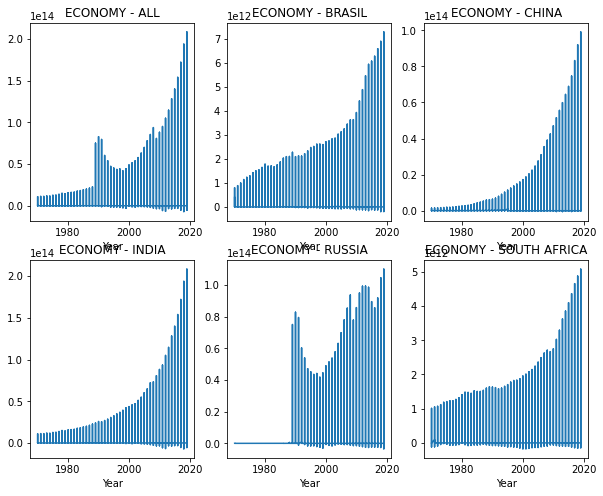

In [16]:
# definindo as configurações dos graficos na mesma página e tamanho da figura
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

# plotando as informações de todos os paises de todos os anos
df_economy.plot(x='Year', y='Value', title='ECONOMY - ALL', figsize=(10,8), ax=ax[0,0], legend=False)

# Plotando o gráfico linear dos valores economicos do BRASIL
df_economy[df_economy['CountryCode']=='BRA'].plot(x='Year', y='Value', title='ECONOMY - BRASIL', ax=ax[0, 1], legend=False)

# Plotando o gráfico linear dos valores economicos da CHINA
df_economy[df_economy['CountryCode']=='CHN'].plot(x='Year', y='Value', title='ECONOMY - CHINA', ax=ax[0, 2], legend=False)

# Plotando o gráfico linear dos valores economicos do INDIA
df_economy[df_economy['CountryCode']=='IND'].plot(x='Year', y='Value', title='ECONOMY - INDIA', ax=ax[1, 0], legend=False)

# Plotando o gráfico linear dos valores economicos da RUSSIA
df_economy[df_economy['CountryCode']=='RUS'].plot(x='Year', y='Value', title='ECONOMY - RUSSIA', ax=ax[1, 1], legend=False)

# Plotando o gráfico linear dos valores economicos da SOUTH AFRICA	
df_economy[df_economy['CountryCode']=='ZAF'].plot(x='Year', y='Value', title='ECONOMY - SOUTH AFRICA', ax=ax[1, 2], legend=False)

## -  Os gráficos nos mostram que: 
- no geral, os países tiveram um crescimento quase exponencial ao longo dos anos;
- RUSSIA: apresentou uma queda próximo do ano 2000, mas depois voltou a crescer;
- BRASIL, CHINA, INDIA e AFRICA DO SUL: Alavancaram após os anos 2000.

### b) usando o dataset PRIVATE SECTOR

In [17]:
df_private_sector.groupby(by='CountryCode').sum().drop(columns=['Year'])

,Value
CountryCode,
BRA,1.835112e+13
CHN,1.229084e+14
IND,2.601728e+13
RUS,2.611897e+13
ZAF,8.667364e+12


<AxesSubplot:title={'center':'PRIVATE SECTOR - SOUTH AFRICA'}, xlabel='Year'>

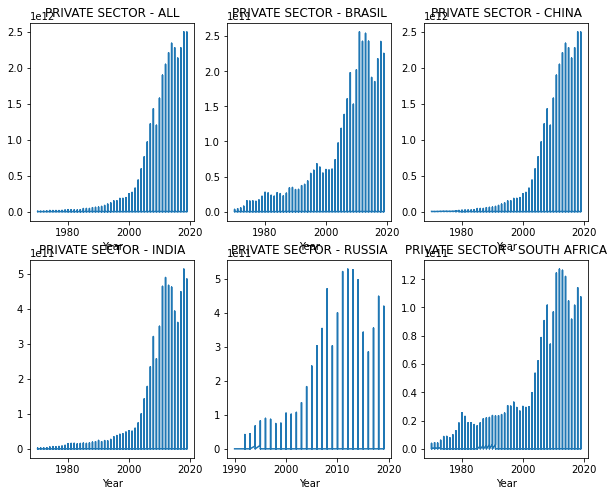

In [18]:
# definindo as configurações dos graficos na mesma página e tamanho da figura
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

# plotando as informações de todos os paises de todos os anos
df_private_sector.plot(x='Year', y='Value', title='PRIVATE SECTOR - ALL', figsize=(10,8), ax=ax[0,0], legend=False)

# Plotando o gráfico linear dos valores economicos do BRASIL
df_private_sector[df_private_sector['CountryCode']=='BRA'].plot(x='Year', 
                                                                y='Value', title='PRIVATE SECTOR - BRASIL', ax=ax[0, 1], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da CHINA
df_private_sector[df_private_sector['CountryCode']=='CHN'].plot(x='Year', 
                                                                y='Value', title='PRIVATE SECTOR - CHINA', ax=ax[0, 2], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos do INDIA
df_private_sector[df_private_sector['CountryCode']=='IND'].plot(x='Year', 
                                                                y='Value', title='PRIVATE SECTOR - INDIA', ax=ax[1, 0], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da RUSSIA
df_private_sector[df_private_sector['CountryCode']=='RUS'].plot(x='Year', 
                                                                y='Value', title='PRIVATE SECTOR - RUSSIA', ax=ax[1, 1], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da SOUTH AFRICA	
df_private_sector[df_private_sector['CountryCode']=='ZAF'].plot(x='Year', 
                                                                y='Value', title='PRIVATE SECTOR - SOUTH AFRICA', ax=ax[1, 2], 
                                                                legend=False)

## -  Os gráficos nos mostram que: 
- A tenência geral é crescente após 2000, mas com alguns baixos ao longo dos anos;
- Russia não tem informações de antes de 1990, ou seja, menos que os outros países;

### c) usando o dataset PUBLIC SECTOR

In [19]:
df_public_sector.groupby(by='CountryCode').sum().drop(columns=['Year'])

,Value
CountryCode,
BRA,1.306499e+14
CHN,2.651023e+14
IND,1.645531e+15
RUS,1.361828e+15
ZAF,9.209841e+13


<AxesSubplot:title={'center':'PUBLIC SECTOR - SOUTH AFRICA'}, xlabel='Year'>

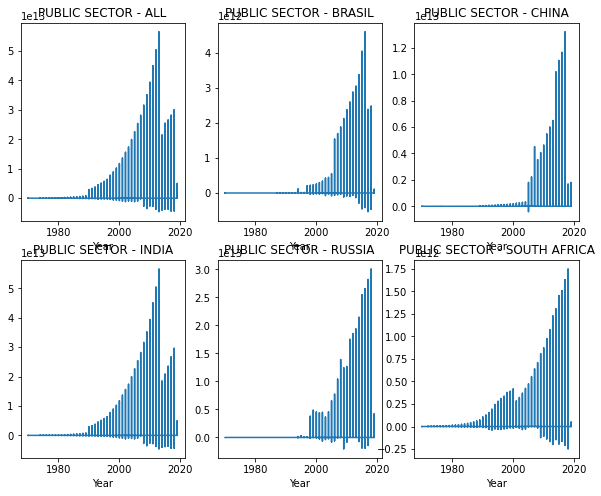

In [20]:
# definindo as configurações dos graficos na mesma página e tamanho da figura
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

# plotando as informações de todos os paises de todos os anos
df_public_sector.plot(x='Year', y='Value', title='PUBLIC SECTOR - ALL', figsize=(10,8), ax=ax[0,0], legend=False)

# Plotando o gráfico linear dos valores economicos do BRASIL
df_public_sector[df_public_sector['CountryCode']=='BRA'].plot(x='Year', 
                                                                y='Value', title='PUBLIC SECTOR - BRASIL', ax=ax[0, 1], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da CHINA
df_public_sector[df_public_sector['CountryCode']=='CHN'].plot(x='Year', 
                                                                y='Value', title='PUBLIC SECTOR - CHINA', ax=ax[0, 2], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos do INDIA
df_public_sector[df_public_sector['CountryCode']=='IND'].plot(x='Year', 
                                                                y='Value', title='PUBLIC SECTOR - INDIA', ax=ax[1, 0], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da RUSSIA
df_public_sector[df_public_sector['CountryCode']=='RUS'].plot(x='Year', 
                                                                y='Value', title='PUBLIC SECTOR - RUSSIA', ax=ax[1, 1], 
                                                                legend=False)

# Plotando o gráfico linear dos valores economicos da SOUTH AFRICA	
df_public_sector[df_public_sector['CountryCode']=='ZAF'].plot(x='Year', 
                                                                y='Value', title='PUBLIC SECTOR - SOUTH AFRICA', ax=ax[1, 2], 
                                                                legend=False)

## -  Os gráficos nos mostram que: 
- Para o setor publico, não temos informações de antes de 1990;
- No geral, é observada a mesma tendência de crescimento após os anos 2000 em todos os países.

---